<a href="https://colab.research.google.com/github/marcosfelt/interview_study_plan/blob/main/k_means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Goal: Implement K-means

Inspired by https://www.youtube.com/watch?v=xKZHH-UOsUM

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Problem Setup

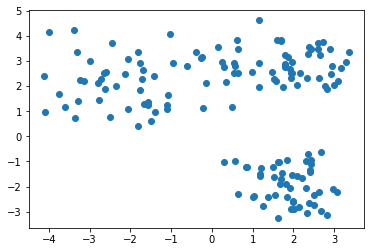

In [7]:
a = np.random.multivariate_normal([-2,2], [[1.0,0], [0,1.]], 50).T
b = np.random.multivariate_normal([2,-2], [[0.5,0], [0,0.5]], 50).T
c = np.random.multivariate_normal([2,3], [[1.0,0], [0,0.5]], 50).T
X = np.hstack((a,b,c))
plt.scatter(X[0], X[1])

## Training Objective

The objective is to 
- minimize the distance between every point and its closest cluster
- maximize the distance between clusters

Formally:

i: point index
j: cluster index
k - number of clusters

$\min cost(X, \mu_1, \dots, \mu_k, k) = \min_{C_i} \sum_i \sum_{x_i \in c_i} \vert\vert x - \mu_{c_i} \vert \vert^2  $



## K-means implementaiton

In [26]:
def distance(u, v):
  """Distance metric - we'll choose L2"""
  return np.linalg.norm(u-v)

def calculate_closest_cluster(point, cluster_means):
  closest_cluster = 0
  min_distance = np.float("inf")
  for j, cluster_mean in enumerate(cluster_means):
    d = distance(point, cluster_mean)
    if d < min_distance:
      min_distance = d
      closest_cluster = j
  return closest_cluster

def calculate_cluster_mean(points):
  return np.mean(points, axis=0)

def k_means(points, k, max_iterations: int = 100):
  # Notation
  # i for point index
  # j for cluster index

  # Data structures
  n = len(points)
  point_to_cluster_ind = [0] * n
  cluster_means = [0] * k

  # Random initialization of the clusters
  means_inds = np.random.randint(low=0, high=n, size=k)
  cluster_means = points[means_inds]

  # Iterate to refine the clusters
  while max_iterations > 0:
      max_iterations -= 1

      # Initialize map from cluster index (j) to point index (i)
      cluster_to_point_ind = [[] for _ in range(k)]

      # Calculate the closest cluster for each point
      for i in range(n):
        j = calculate_closest_cluster(points[i], cluster_means)
        point_to_cluster_ind[i] = j
        cluster_to_point_ind[j].append(i)

      # Recalculate the cluster mean
      for j in range(k):
        cluster_means[j] = calculate_cluster_mean(
            points[cluster_to_point_ind[j]]
        )

  return point_to_cluster_ind

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  import sys


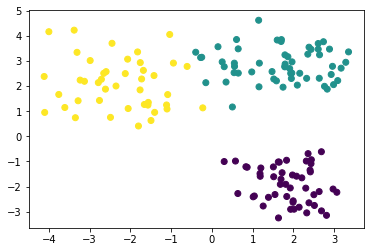

In [32]:
points = X.T
clusters = k_means(points, 3)
plt.scatter(X[0], X[1], c=clusters)

## Time and Space Complexity

- l - iterations
- n*k - closest cluster calcuation
- n*k - cluster mean

Time complexity: $$O(l n k)$$

- n - point_cluster_ind
- ~n - cluster_point_ind
- k - cluster-means

Space complexity: 
$$O(nk)$$